## 支持向量机（SVM）
### 1. 基本概念

**支持向量：** 在线性可分的情况下，训练数据集中与分类超平面距离最近的样本点的实例。
**间隔**
**间隔边界**
**函数间隔：** 对于给定的训练数据集$T$和超平面$(w,b)$，定义超平面和样本点$(x_i,y_i)$的函数间隔为：
$$
\hat{\gamma}_i=y_i(w\cdot{x_i}+b) \tag{1}
$$
所有样本点关于超平面的函数间隔可以表示分类预测正确性和确信度：
$$
\hat{\gamma}= \mathop{min}\limits_{i=1,...,N}\hat{\gamma}_i \tag{2}
$$
该间隔当$w$和$b$等比例扩大时，间隔也扩大，所以引入**几何间隔**，使间隔度量确定。

**几何间隔：** 超平面$(w,b)$关于样本点$(x_i,y_i)$的几何间隔一般使实例到超平面的带符号距离，当样本点被超平面分类正确时就是实例点到超平面的距离。
$$
{\gamma}_i=y_i\left(\frac{w}{||w||}\cdot x_i + \frac{b}{||w||}\right) \tag{3}
$$

$$
{\gamma}= \mathop{min}\limits_{i=1,...,N}{\gamma}_i \tag{4}
$$

由上可以函数间隔和几何间隔的关系：
$$
\gamma=\frac{\hat{\gamma}}{||w||}
$$
**硬间隔最大化：** 对训练数据找到几何间隔最大化的超平面意味着：以充分大的确信度对训练数据进行分类。
$$
\begin{aligned}
  &\max\limits_{w,b} \gamma \\
  &s.t.\  \ \  y_i\left(\frac{w}{||w||}\cdot x_i + \frac{b}{||w||}\right) \ge \gamma    
\end{aligned}\tag{5}
$$
由函数间隔和几何间隔的关系可以将上式改为如下凸二次规划问题：
$$
\begin{aligned}
  &\mathop{min}\limits_{w,b} \quad \frac{1}{2}||w||^2  \\
  &s.t. \quad y_i(w\cdot x_i+b)-1 \ge 0, \quad i = 1,...,N
\end{aligned}\tag{6} 
$$

**硬间隔最大化对偶形式：** 支持向量机学习的基本思想是求解找到能够正确划分训练数据集并且几何间隔最大的分离超平面。
![](img/![](img/2020-03-18-16-23-36.png).png)

---

### 3. 软间隔最大化 
软间隔最大化的凸二次规划形式为：
![](img/2020-03-18-16-35-54.png)

更改为对偶形式后算法为：
![](img/2020-03-18-16-24-34.png)
![](img/2020-03-18-16-25-06.png)
### 4. 非线性支持向量机
![](img/2020-03-18-16-25-50.png)
![](img/2020-03-18-16-26-32.png)
![](img/2020-03-18-16-27-10.png)
### 5. SMO算法
SMO算法包括两个部分：求解两个变量的二次规划的解析方法、选择变量的启发式方法。
**两变量二次规划求解**
![](img/2020-03-18-17-20-29.png)
![](img/2020-03-18-17-21-00.png)
![](img/2020-03-18-17-23-43.png)
<font color='red'>
**算法（SMO算法）**

&emsp;&emsp; 输入：训练数据集$T= {(x_1,y_1 )，(x_2,y_2 )，…，(x_N,y_N )}$，其中，$x_i\in \mathcal{X}= R^n$，$y_i \in \mathcal{Y} = \{-1,+1\}, i=1,2,…,N$，精度$\epsilon$:

&emsp;&emsp; 输出：近似解$\hat{\alpha}$

&emsp;&emsp; (1) 取初值$\alpha^{(0)}=0$，令$k=0$；

&emsp;&emsp; (2) 选取优化变量$\alpha_1^{(k)}, \alpha_2^{(k)}$，解析求解两个变量的最优化问题(7.101)~(7.103)，求得最优解$\alpha_1^{(k+1)}, \alpha_2^{(k+1)}$;

&emsp;&emsp;&emsp; a) 外循环选择并更新$\alpha_1^{(k)}$，内循环选择并更新$\alpha_2^{(k)}$;

&emsp;&emsp;&emsp; b) 更新$\alpha$为$\alpha^{(k+1)}$，并且截断（公式7.108）;

![](img/2020-03-19-14-36-15.png)
![](img/2020-03-19-14-36-47.png)
![](img/2020-03-19-14-24-57.png)
&emsp;&emsp;&emsp; c) 更新$b$和所有样本的误差$E_i$;

![](img/2020-03-19-14-23-32.png)

&emsp;&emsp;（3）若在精度$\epsilon$范围内满足停机条件

$$
\begin{aligned}
  &\sum_{i=1}^{N}\alpha_i y_i = 0, \\
  &0\le\alpha_i \le C, i = 1,2...,N \\ 
  &y_i\cdot g(x_i) \left\{ \begin{aligned}
    &\ge 1, &\{ x_i|\alpha_i=0\} \\
    &= 1, &\{ x_i|0<\alpha_i<C\} \\
    &\le 1, &\{ x_i|\alpha_i=C\}
  \end{aligned}\right.
\end{aligned}
$$

&emsp;&emsp; (3) 否则转到(2)
</font>

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### 生成数据
该数据有两种，一种是使用sklearn自带的鸢尾花数据集，该数据集比较简单，可以快速验证效果

另一种是mnist手写字符数据集

In [5]:
# 使用sklearn的鸢尾花数据集，生成数据（前两种label）
def gen_data(data_size=100,visualization=False):
    iris_data = load_iris()
    df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df['label']=iris_data.target
    df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100,[0,1,-1]])
    for i in data:
        if i[-1] == 0:
            i[-1] = int(-1)
        elif i[-1] == 1:
            i[-1] = int(1)
    # print(data)
    X = data[:, :2]
    y = data[:,-1]
    # print(X,y)
    if visualization == True:
        X1,X2 = X[:50,:],X[50:,:]
        label1, label2 = '-1','1'
        X_visualization(X1,X2,label1,label2)
    return X,y

def load_mnist(train_file, test_file):
    X_train=[]
    X_test=[]
    y_train=[]
    y_test=[]
    with open(train_file,"r") as train_f:
        data = train_f.readlines()
        for line in data:
            line = line.strip().split(",")
            # print(line)
            if (int(line[0]) == 0):
                y_train.append(1)
            else:
                y_train.append(-1)
            X_train.append([int(i)/255 for i in line[1:]])
    with open(test_file,"r") as test_f:
        data = test_f.readlines()
        for line in data:
            line = line.strip().split(",")
            if (int(line[0]) == 0):
                y_test.append(1)
            else:
                y_test.append(-1)
            X_test.append([int(i)/255 for i in line[1:]])
    # print(len(X_train[0]))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    return X_train,X_test,y_train,y_test


In [7]:
# 可视化数据
def X_visualization(X1,X2,label1,label2, show_classification_result=False,w1=0,w2=0,b=0):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X1[:,0],X1[:,1])
    ax.scatter(X2[:,0],X2[:,1])
    if show_classification_result==True:
        x = np.arange(4.0,7.0,0.1)
        y = (-b - w1*x) /w2
        ax.plot(x,y)
        plt.legend(('result',label1, label2),loc='upper right')
    else:
        plt.legend((label1, label2),loc='upper right')
    plt.xlabel('length(cm)')
    plt.ylabel('length(cm)')
    plt.title("iris data")
    plt.show()

# 展示分类超平面
def show_result(X,w1=1,w2=1,b=1):
    X1,X2 = X[:50,:],X[50:,:]
    label1, label2 = '-1','1'
    X_visualization(X1,X2,label1,label2,show_classification_result=True,w1=w1,w2=w2,b=b)

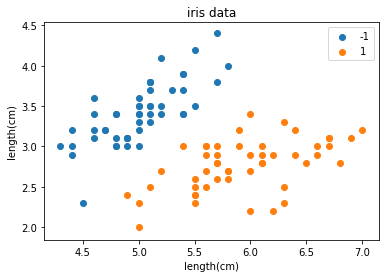

In [8]:
# 展示数据
visualization = True
X,y = gen_data(data_size=data_size,visualization=visualization)

参数说明：
    ```
    self.X:             训练数据
    self.y:             标签
    self.m,self.n:      m,n分别代表训练数据的行数和列数
    self.max_iter；     最大迭代次数
    self.C:             KKT条件
    self.epsilon:       松弛变量
    self.fun_kernel:   核函数选择：可选参数: linear、poly、gaussian
    self.alpha:         核心参数
    self.E:             核心参数
    self.sigma:         使用高斯核时，高斯函数的参数
    self.b:             初始化 = 0.0
    self.w:             初始化 = 0.0
    ```

In [9]:
class SVM:
    def __init__(self, max_iter=100, C=1.0, epsilon=0.001, fun_kernel='linear'):
        self.max_iter = max_iter
        self.C = C
        self.fun_kernel=fun_kernel
        # 松弛变量
        self.epsilon = epsilon
        # 使用高斯核时的参数sigma
        self.sigma = 10.0
    
    def _init_param(self, X, y):
        self.X = X
        self.y = y
        self.b = 0.0
        self.w = 0.0
        # m,n分别是训练数据的行数和列数
        self.m,self.n = X.shape

        self.alpha = np.zeros(self.m)
        self.E = [self.E_i(i) for i in range(self.m)]
        
        self.support_vectors = []
    
    # 核函数计算
    def kernel(self, x1, x2):
        if self.fun_kernel == 'linear':
            return np.dot(x1, x2)
        elif self.fun_kernel == 'poly':
            return (np.dot(x1, x2)+1)**2
        elif self.fun_kernel == 'gaussian':
            return np.exp(-1 * np.matmul(x1-x2,(x1-x2).T) / (2* (self.sigma **2)))
    
    # 外层循环时求 g(x)
    def gx(self, i):
        g = self.b
        for j in range(self.m):
            g += self.alpha[j] * self.y[j] * self.kernel(self.X[i], self.X[j])
        return g
    
    # 外层循环时求 E_i
    def E_i(self, i):
        return self.gx(i) - self.y[i]
    
    # 判断第i个alpha是否满足KKT条件，使用加了松弛变量的条件
    def KKT(self, i):
        y_gx = self.y[i] * self.gx(i) 
        if (abs(self.alpha[i])<self.epsilon) and (y_gx >= 1):
            return True
        elif (abs(self.alpha[i]-self.C) <self.epsilon) and (y_gx <= 1):
            return True
        elif (self.alpha[i]>-self.epsilon) and (self.alpha[i] < (self.C+self.epsilon)) and (abs(y_gx-1) <self.epsilon):
            return True
        else:
            return False

    # 截断公式
    def cut_off(self, alpha, i1, i2):
        # 计算边界
        L=H=0
        if self.y[i1] == self.y[i2]:
            L = max(0, self.alpha[i1]+self.alpha[i2]-self.C)
            H = min(self.C, self.alpha[i2]+self.alpha[i1])
        else:
            L = max(0, self.alpha[i2]-self.alpha[i2])
            H = min(self.C, self.C+self.alpha[i2]-self.alpha[i1])
        # 截断
        if alpha > H:
            return H 
        elif alpha <L:
            return L
        else:
            return alpha
    
    # 两重循环选择变量alpha
    def select_alpha(self):
        # 外层循环首先看0<a<C的点是否满足KKT条件
        idx_list = [i for i in range(self.m) if 0<self.alpha[i]<self.C]
        # 否则遍历整个数据集
        non_satisfy_list = [i for i in range(self.m) if i not in idx_list]
        idx_list.extend(non_satisfy_list)

        for i in idx_list:
            if self.KKT(i):
                continue
            E1 = self.E[i]
            if E1 >= 0:
                j = np.argmin(self.E)
            else:
                j = np.argmax(self.E)
            return i,j

    # 计算阈值参数b
    def cal_b(self, alpha1_new, alpha2_new, K11,K22,K12,K21, E1, E2, i1,i2):
        b1_new = -E1 - self.y[i1]*K11*(alpha1_new-self.alpha[i1]) - self.y[i2]*K21*(alpha2_new-self.alpha[i2]) + self.b
        b2_new = -E2 - self.y[i1]*K12*(alpha1_new-self.alpha[i1]) - self.y[i2]*K22*(alpha2_new-self.alpha[i2]) + self.b
        if 0 < alpha1_new < self.C:
            return b1_new
        elif 0 < alpha2_new < self.C:
            return b2_new
        else:
            return (b2_new+b1_new)/2
    
    # 训练过程
    def fit(self, X, y):
        self._init_param(X, y)
        # train
        for k in range(self.max_iter):
            # 选择两个alpha
            i1,i2 = self.select_alpha()
            E1 = self.E[i1]
            E2 = self.E[i2]
            K11 = self.kernel(self.X[i1],self.X[i1])
            K12 = self.kernel(self.X[i1],self.X[i2]) 
            K21 = self.kernel(self.X[i2],self.X[i1]) 
            K22 = self.kernel(self.X[i2],self.X[i2])
            eta = K11 + K22 - 2*K12
            if eta <= 0: continue
            # 更新alpha2
            alpha2_new_unc = self.alpha[i2] + self.y[i2] * (E1-E2) / eta
            alpha2_new = self.cut_off(alpha2_new_unc, i1, i2) 

            #更新alpha1
            alpha1_new = self.alpha[i1] + self.y[i1] * self.y[i2] * (self.alpha[i2] - alpha2_new)

            # 更新b和E
            b_new = self.cal_b(alpha1_new, alpha2_new, K11,K22,K12,K21, E1, E2, i1,i2)
            
            # 更新所有参数
            self.alpha[i1] = alpha1_new
            self.alpha[i2] = alpha2_new
            self.b = b_new
            # 更新差值E
            self.E[i1] = self.E_i(i1)
            self.E[i2] = self.E_i(i2)
        for i in range(self.m):
            if self.alpha[i] > 0:
                self.support_vectors.append(i)
        return "train done!"

    def predict(self, data):
        gx = self.b
        for i in range(self.m):
            gx += self.alpha[i] * self.y[i] * self.kernel(data, self.X[i])
        if gx>0:
            fx = 1
        else:
            fx = -1
        return fx
    # 验证SVM模型在测试数据集上的准确率
    def score(self, X_test, y_test):
        count=0
        for i in range(len(X_test)):
            pred = self.predict(X_test[i])
            if pred == y_test[i]:
                count += 1 
        accuracy = count/len(X_test)
        return accuracy
    # 返回权重w
    def weights(self):
        y_x = self.y.reshape(-1,1)*self.X
        self.w = np.dot(y_x.T, self.alpha)
        return self.w

In [42]:
#一些超参数
C = 1.0
epsilon = 0.001
max_iter = 70
data_size = 100
visualization = False

测试线性核在iris数据集结果，并可视化分类界面等信息

支持向量数为 6
svm预测准确率： 1.0
w权重分别表示为 1.6999999999999984 -0.9000000000000004 -6.414981825659044
可视化分类界面如下


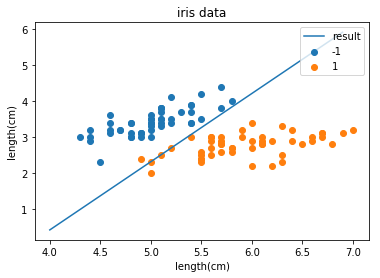

In [41]:
fun_kernel='linear'

X,y = gen_data(data_size=data_size,visualization=visualization)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
svm = SVM(max_iter=max_iter, C=C, fun_kernel=fun_kernel, epsilon=epsilon)
svm.fit(X_train,y_train)
acc = svm.score(X_test,y_test)
w1,w2 = svm.weights()
b=svm.b
print("支持向量数为", len(svm.support_vectors)) 
print("svm预测准确率：",acc)
print("w权重分别表示为", w1,w2,b)
print("可视化分类界面如下")
show_result(X,w1=w1,w2=w2,b=b)

In [43]:
# 测试多项式核的结果
fun_kernel='linear'
svm = SVM(max_iter=max_iter, C=C, fun_kernel=fun_kernel, epsilon=epsilon)
svm.fit(X_train,y_train)
acc = svm.score(X_test,y_test)
w1,w2 = svm.weights()
b=svm.b 
print("svm预测准确率：",acc)

svm预测准确率： 1.0


In [46]:
# 测试多项式核的结果
fun_kernel='gaussian'
svm = SVM(max_iter=max_iter, C=C, fun_kernel=fun_kernel, epsilon=epsilon)
svm.fit(X_train,y_train)
acc = svm.score(X_test,y_test)
w1,w2 = svm.weights()
b=svm.b 
print("svm预测准确率：",acc)

svm预测准确率： 0.9


In [49]:
# 测试高斯核在mnist数据集上的表现
# 这里使用mnist的前1000个数据作为训练数据
max_iter = 150
fun_kernel='gaussian'
X_train,X_test,y_train,y_test = load_mnist("./data/mnist_train.csv","./data/mnist_test.csv")
svm = SVM(max_iter=max_iter, C=C, fun_kernel=fun_kernel, epsilon=epsilon)
svm.fit(X_train[:1000],y_train[:1000])
acc = svm.score(X_test[:1000],y_test[:1000])
print("svm预测准确率：",acc)

svm预测准确率： 0.954
